# Assignment 3

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `Data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix $X$, class vector $y$, and the lists $attributeNames$ and $classNames$ with the data provided in the `wine.mat` file. Print out the  $attributeNames$ and $classNames$ to make sure it's a list of strings.

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ is shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.*



In [1]:
from scipy import io
from sklearn import tree
import numpy as np

data = io.loadmat('Data/wine.mat')

attributeNames = data['attributeNames'][0]
attributeNames = [nested_array[0] for nested_array in attributeNames]

classNames = data["classNames"]
classNames = classNames.ravel()
classNames = [nested_array[0] for nested_array in classNames]
classNames = np.asarray(classNames).reshape((-1))

X = data['X']
y = data['y']
y = y.reshape((-1))

print("Attribute names: ", attributeNames)
# checking that this is a list of numpy strings
assert np.all([type(item) is np.str_ for item in attributeNames])
print("\n")
print("attributeNames is indeed a list of numpy strings")  



print("\n")
print("Class names:", classNames)
# checking that this is a list of numpy strings
assert np.all([type(item) is np.str_ for item in classNames])
print("\n")
print("classNames is indeed a list of numpy strings")    


Attribute names:  ['Fixed acidity', 'Volatile acidity', 'Citric acid', 'Residual sugar', 'Chlorides', 'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alcohol']


attributeNames is indeed a list of numpy strings


Class names: ['Red' 'White']


classNames is indeed a list of numpy strings


#### 3.1.2
 (1.5 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py` in the Toolbox folder. 

** hints: **   
*The `treeprint.py` file contains some documentation on how to use it. Helpfull documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  



In [2]:
from sklearn import tree
from Toolbox.treeprint import tree_print


print("With min_samples_split = 100:\n")
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 100)
tree_print(clf.fit(X,y),attributeNames,classNames)
print("\n")

print("With min_samples_split = 10:\n")
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 10)
tree_print(clf.fit(X,y),attributeNames,classNames)
print("\n")

print("With min_samples_split = 1000:\n")
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 1000)
tree_print(clf.fit(X,y),attributeNames,classNames)





With min_samples_split = 100:

         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |        |  |
   |        |  |        |

<------------------------------------------------------------------------------------------------------->
Tree Depth:  21


With min_samples_split = 1000:

      |->2  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 3
   |  |
   |  |  |->4  White
   |  |  |
   |  |->3 else if Sulphates =< 0.37: go to 4, else go to 5
   |     |
   |     |  |->6  White
   |     |  |
   |     |->5 else if Density =< 0.99: go to 6, else go to 7
   |        |
   |        |     |->9  White
   |        |     |
   |        |  |->8 then if Residual sugar =< 1.10: go to 9, else go to 10
   |        |  |  |
   |        |  |  |  |->11  Red
   |        |  |  |  |
   |        |  |  |->10 else if Density =< 0.99: go to 11, else go to 12
   |        |  |     |
   |        |  |     |  |->13  Red
   |        |  |     |  |
   |        |  |     |->12 else if Chlorides =< 0.05: go to 13, else go to 14
   |        |  |        |
   |        |  |        |  |->15  Red
   |        |  |        |  |
   |     

----

The larger the  'min_samples_split' parameter is, the less deeper the tree gets. 
Quoting from the documentation of the DecisionTreeClassifier function: "min_samples_split can create arbitrarily small leaves".

If we put min_samples_split equals to number of observations we'll have only one node and this is clearly underfitting because we can't do predicitions with one node. 
On the opposite side, if you put min_samples_split equals to 1  you are overfitting: you are not generalizing and learning from the data. 

The best option is something in the middle of two extreme cases (for example in this case 100 could be a good option).

----

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? 

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. *

In [27]:
import numpy as np

clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 100)
clf.fit(X,y)

### creating the sample from the given values above
sample = [[6.9, 1.09, 0.05, 2.1, 0.0061, 12.0, 31.0, 0.99, 3.5, 0.64, 0.12]]

### predicting the class with the predict() method
predicted_class = clf.predict(sample)
print("\n\nPredicted class by the decision tree classifier:", classNames[predicted_class][0],"wine\n\n\n")

tree_print(clf.fit(X,y),attributeNames,classNames)



Predicted class by the decision tree classifier: White wine



         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |    

----

It uses only the 'Total sulfur dioxide' and 'Chlorides' attributes to predict the label for the sample because the attribute 'Total sulfur dioxide' which in this case is smaller 66.5 (in this case it's 31), and then it goes to the 'Chlorides' node (node one), where in our sample 'Chlorides' is 0.0061 which is less than 0.05. 

We don't need 'Sulphates' in this case because it leads to white wine in both leaves, so it doesn't matter if we have level of 'Sulphates' above or below 0.56 (as stated in node two).

----

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?



In [4]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 100)
clf.fit(X,y)

### first solution using only numpy
### the predicted classes for all x in X
predicted_classes = clf.predict(X)
### the number of non-zero numbers in result indicates the number of samples which were incorrectly classified
result = y - predicted_classes
shape = np.shape(result)
size = shape[0]

bad_preds = np.count_nonzero(result)
good_preds = size - bad_preds
percentage = 100 * good_preds / size
print("The tree classified ",percentage,"% of the data correctly")
print("\n")

### second solution using the clf's score feature
score = clf.score(X,y)
percentage = 100 * score
print("The tree classified ",percentage,"% of the data correctly")

The tree classified  98.68337563451777 % of the data correctly


The tree classified  98.68337563451777 % of the data correctly


----

The tree classified a little less than 98.7% of the data correctly, so the error is almost 1.3%.

----

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `Data/wine.mat`. Divide the data into a training and a test data set (see hints!). Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 to 20), 
+ first fit the decision tree
+ then compute the classification error on the training and test set (this is called holdout cross-validation)

When you've done this for `depth` values 2,...,20, plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. The error is 1-accuracy. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?


Adding the library we will use

In [5]:
from scipy import io
import sklearn.model_selection as skl
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

Retrieve the data and split them in training and test set; we are using 0.3 as holdout (30% of data in the test dataset, 70% in the training one)

In [6]:
#shows how much data you want to put in the testing dataset, the rest goes to the training one
holdout = 0.3

#use the same seed for all the depths
random_seed = 0

data = io.loadmat("Data/wine.mat")
X = data['X']
y = data['y']

#stratify maintain the proportion of the classes inside train and test dataset
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=holdout, stratify=y, random_state=random_seed)

Fit the classifier and calculate the error in training and testing using different depths

In [7]:
err_train = np.zeros(21)
err_test = np.zeros(21)

for i in range(2, 21):
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=random_seed)
    clf = clf.fit(X_train, y_train)
    err_train[i] = 1 - clf.score(X_train, y_train)
    err_test[i] = 1 - clf.score(X_test, y_test)
    print("\ndepth of the tree:", clf.get_depth())
    print("error on the training set:", err_train[i])
    print("error on the testing set:", err_test[i])


depth of the tree: 2
error on the training set: 0.04215775158658208
error on the testing set: 0.050211416490486216

depth of the tree: 3
error on the training set: 0.024252039891205834
error on the testing set: 0.03118393234672301

depth of the tree: 4
error on the training set: 0.010426110607434258
error on the testing set: 0.020613107822410104

depth of the tree: 5
error on the training set: 0.006346328195829587
error on the testing set: 0.014799154334038

depth of the tree: 6
error on the training set: 0.004533091568449721
error on the testing set: 0.014270613107822405

depth of the tree: 7
error on the training set: 0.002266545784224805
error on the testing set: 0.015856236786469302

depth of the tree: 8
error on the training set: 0.0011332728921124025
error on the testing set: 0.014799154334038

depth of the tree: 9
error on the training set: 0.0009066183136899886
error on the testing set: 0.014270613107822405

depth of the tree: 10
error on the training set: 0.000679963735267463

Let's plot the error in a bar plot, looking what happen with different depths

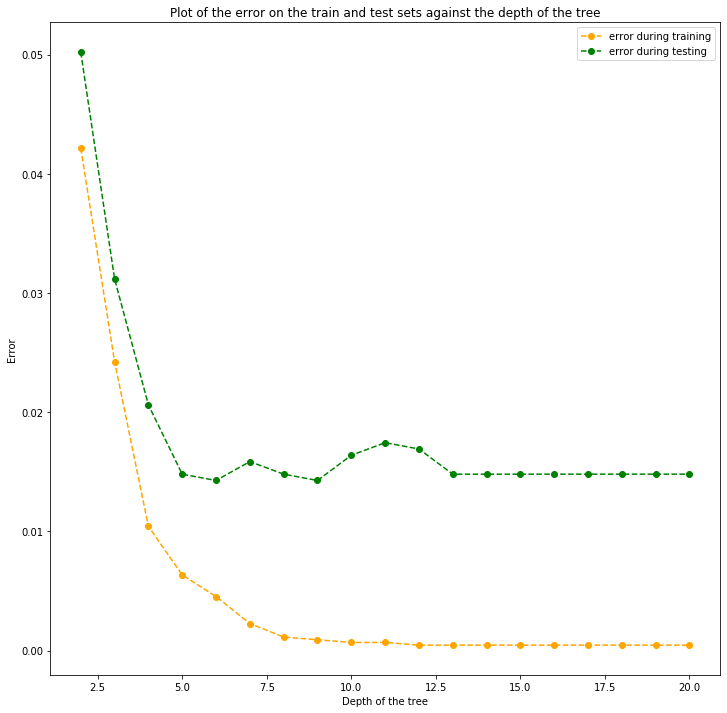

In [8]:
fig = plt.figure(figsize=(12,12))

depthX = np.arange(19) + 2

plt.plot(depthX,err_train[2:], '--o', color='orange', label="error during training")
plt.plot(depthX,err_test[2:], '--o', color='g', label="error during testing")
plt.xlabel('Depth of the tree')
plt.ylabel('Error')
plt.title('Plot of the error on the train and test sets against the depth of the tree')
plt.legend()
plt.show()

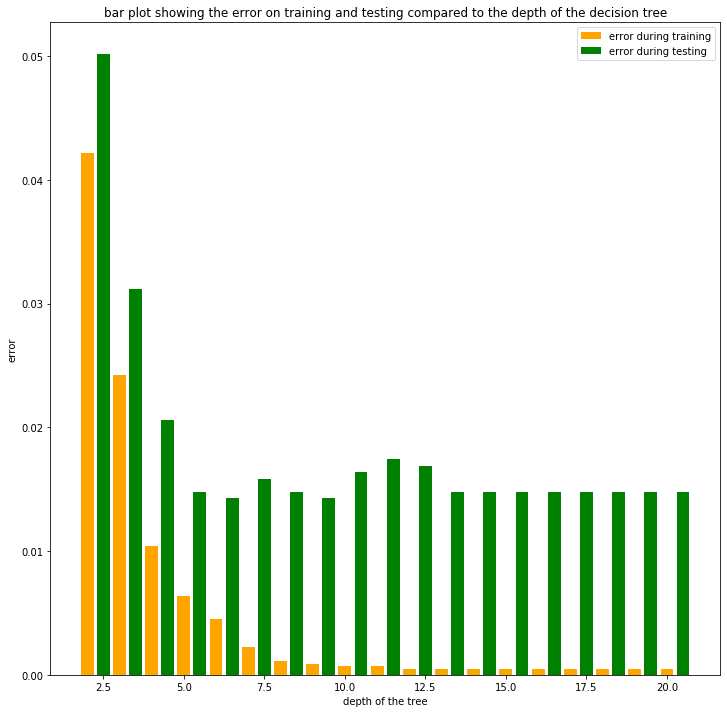

In [9]:
depthX = np.arange(19) + 2

fig = plt.figure(figsize=(12,12))

plt.bar(depthX, err_train[2:], width=0.4, color='orange', label="error during training")
plt.bar(depthX + 0.5, err_test[2:], width=0.4, color='g', label="error during testing")
plt.xlabel('depth of the tree')
plt.ylabel('error')
plt.title('bar plot showing the error on training and testing compared to the depth of the decision tree')
plt.legend()
plt.show()

And then plot the error of the training set against the testing one

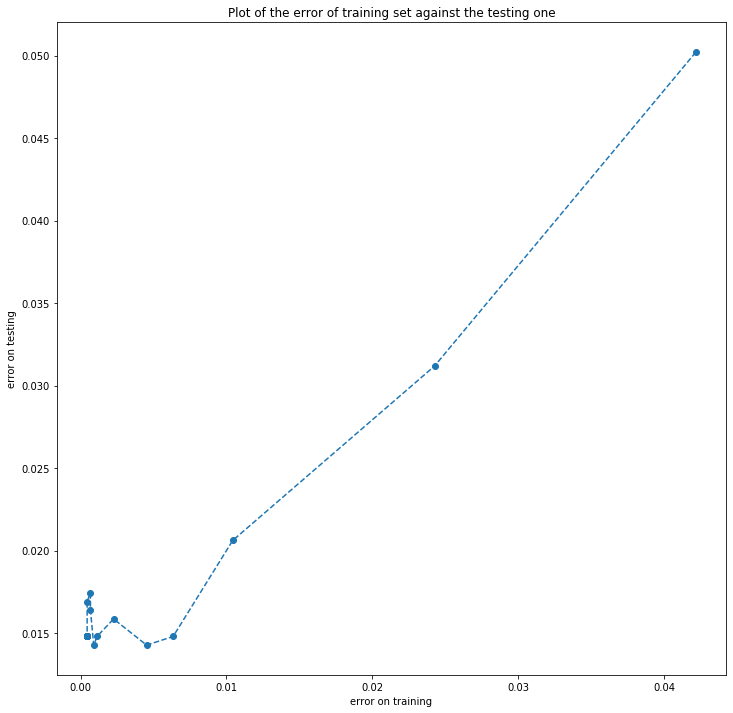

In [10]:
fig = plt.figure(figsize=(12,12))

plt.plot(err_train[2:],err_test[2:], '--o')
plt.xlabel('error on training')
plt.ylabel('error on testing')
plt.title('Plot of the error of training set against the testing one')
plt.show()

----

In this case after analysing the data and the three figures the optimal depth seems to be 6 or 9. 
This is derived mostly from the plots, where we can see that the error decreases in both training and test set until around the 6° point, while it slightly bounce up and down after that, remaining almost the same (almost 0.0005 larger). That's why we can say here there is a good depth, it generalizes better than the deeper trees (we are using less parameters so we are describing the dataset in a more general way) but maintaining an almost perfect error in both training and testing sets.
We can see this trend also in the data: data says that at depth 6 we have a testing error of 0.01427 (the lowest one) with a training error of 0.00453 (so almost 0). The first picture looks the same showing the lowest green bar at depth 6 with a low yellow one.

If we want a more fitted classifier also 9 could be a good choice, we have the same testing error as the tree with depth 6 with a lower training error (but with more parameters, so we assume it is less general).

Now we can re-run the same code using a new split between training and testing sets, looking if the result is different:

----

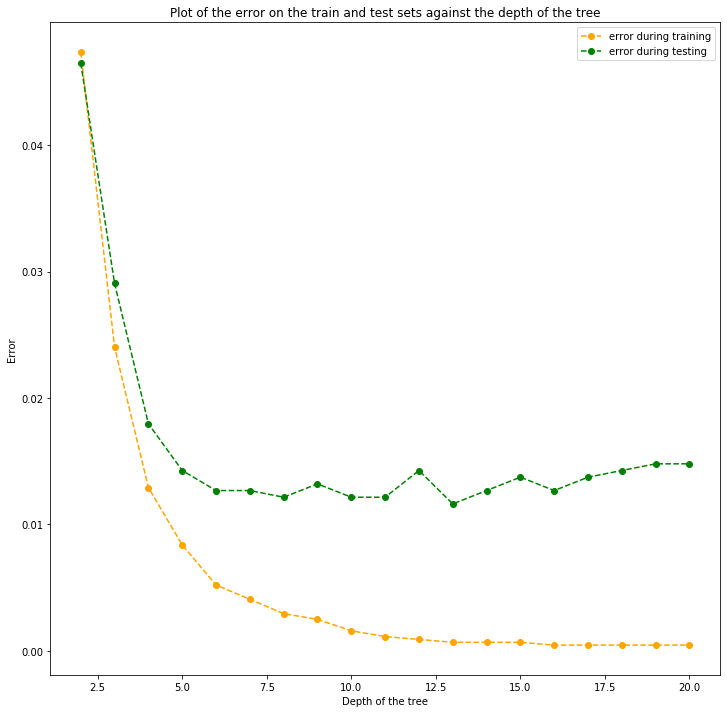

In [11]:
#shows how much data you want to put in the testing dataset, the rest goes to the training one
holdout = 0.3

#use the same seed for all the depths
random_seed = 4

data = io.loadmat("Data/wine.mat")
X = data['X']
y = data['y']

#stratify maintain the proportion of the classes inside train and test dataset
X_train, X_test, y_train, y_test = skl.train_test_split(X, y, test_size=holdout, stratify=y, random_state=random_seed)

err_train = np.zeros(21)
err_test = np.zeros(21)

for i in range(2, 21):
    #We use the same random seed as above
    clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=0)
    clf = clf.fit(X_train, y_train)
    err_train[i] = 1 - clf.score(X_train, y_train)
    err_test[i] = 1 - clf.score(X_test, y_test)

depthX = np.arange(19) + 2

fig = plt.figure(figsize=(12,12))

depthX = np.arange(19) + 2

plt.plot(depthX,err_train[2:], '--o', color='orange', label="error during training")
plt.plot(depthX,err_test[2:], '--o', color='g', label="error during testing")
plt.xlabel('Depth of the tree')
plt.ylabel('Error')
plt.title('Plot of the error on the train and test sets against the depth of the tree')
plt.legend()
plt.show()

----

No, the results slightly change everytime we split the original dataset with a different seed. In this case the best depth seems to be 13, with 8, 10 and 11 as other good choices. 
As we said in the beginning the result is not so different from the original one, with an error in the test set that differ from 0.01427 to 0.01163 (so only 0.003 lower).
That is because we are using almost the same data and in this case probably we are learning on few 'weird' samples that before were in the testing set.

----

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*

*If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:*

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?


In [12]:
from sklearn.model_selection import KFold

K = 10;
random_seed = 0

kf = KFold(n_splits = K, random_state = random_seed)

err_train = np.zeros(21)
err_test = np.zeros(21)


for i in range(2, 21):   
    for train, test in kf.split(X):
        X_test, X_train, y_test, y_train = X[test], X[train],y[test],y[train]

        clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=4)
        clf = clf.fit(X_train, y_train)

        #sum the errors for each fold
        err_train[i] += (1 - clf.score(X_train, y_train))
        err_test[i] += (1 - clf.score(X_test, y_test))

    #finishing to calculate the average
    err_train[i] /= K
    err_test[i] /= K
    print(f"\naverage error on training set with max_depth={i}: ", err_train[i])
    print(f"average error on testing set with max_depth={i}: ", err_test[i])
    


average error on training set with max_depth=2:  0.04087344333873213
average error on testing set with max_depth=2:  0.08053631172490125

average error on training set with max_depth=3:  0.022437097454558585
average error on testing set with max_depth=3:  0.04518300505622216

average error on training set with max_depth=4:  0.012954653948624429
average error on testing set with max_depth=4:  0.029169370865091925

average error on training set with max_depth=5:  0.009359033362182056
average error on testing set with max_depth=5:  0.02869519281563654

average error on training set with max_depth=6:  0.007103026717345496
average error on testing set with max_depth=6:  0.028377732498176246

average error on training set with max_depth=7:  0.005569620575631073
average error on testing set with max_depth=7:  0.024415012703443772

average error on training set with max_depth=8:  0.004459202670560214
average error on testing set with max_depth=8:  0.024095539959248347

average error on traini

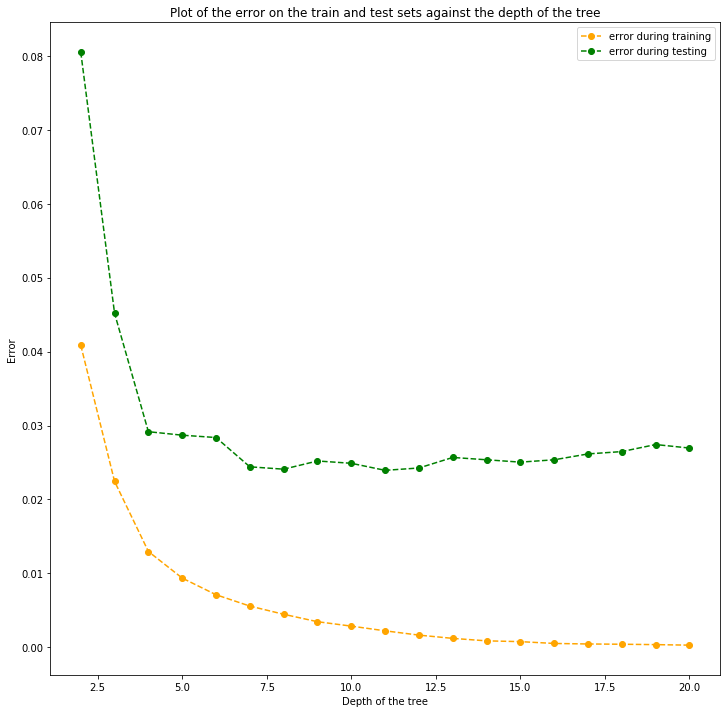

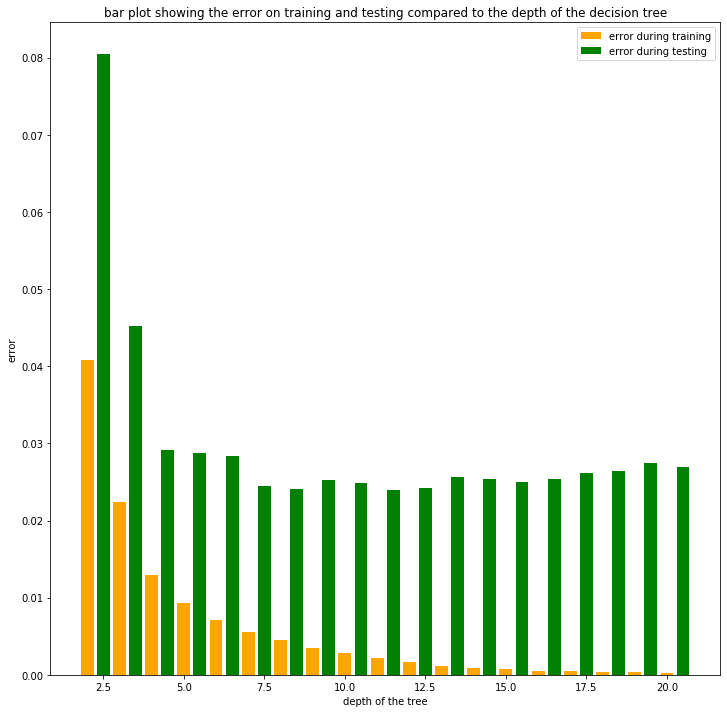

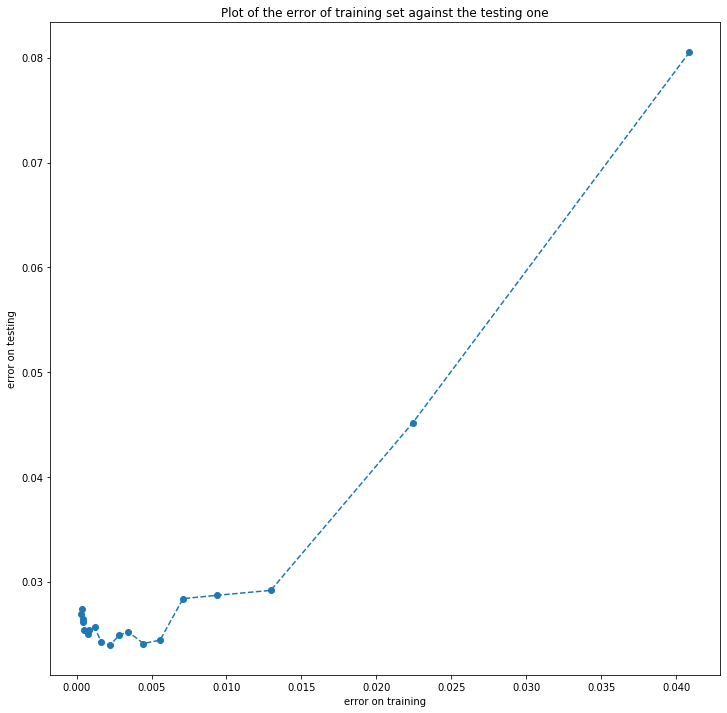

In [13]:
depthX = np.arange(19) + 2

fig = plt.figure(figsize=(12,12))

plt.plot(depthX,err_train[2:], '--o', color='orange', label="error during training")
plt.plot(depthX,err_test[2:], '--o', color='g', label="error during testing")
plt.xlabel('Depth of the tree')
plt.ylabel('Error')
plt.title('Plot of the error on the train and test sets against the depth of the tree')
plt.legend()
plt.show()

fig = plt.figure(figsize=(12,12))

plt.bar(depthX, err_train[2:], width=0.4, color='orange', label="error during training")
plt.bar(depthX + 0.5, err_test[2:], width=0.4, color='g', label="error during testing")
plt.xlabel('depth of the tree')
plt.ylabel('error')
plt.title('bar plot showing the error on training and testing compared to the depth of the decision tree')
plt.legend()
plt.show()

fig = plt.figure(figsize=(12,12))

plt.plot(err_train[2:],err_test[2:], '--o')
plt.xlabel('error on training')
plt.ylabel('error on testing')
plt.title('Plot of the error of training set against the testing one')
plt.show()

----

The optimal tree depth seems to be 11, with the lowest testing error (0.02394) with an almost perfect training accuracy. As before the classifier after this depth tends to overfit, raising the number of the error during testing.

After re-running it without the seed the result seems to change a little bit, and that is because we are training the classifier changing a little bit the training (and test) dataset.

Let's see what happens if we move K from 10 to 100:

----

In [14]:
from sklearn.model_selection import KFold

K = 100;
random_seed = 0

kf = KFold(n_splits = K, random_state = random_seed)

err_train = np.zeros(21)
err_test = np.zeros(21)


for i in range(2, 21):   
    for train, test in kf.split(X):
        X_test, X_train, y_test, y_train = X[test], X[train],y[test],y[train]

        clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=4)
        clf = clf.fit(X_train, y_train)

        #sum the errors for each fold
        err_train[i] += (1 - clf.score(X_train, y_train))
        err_test[i] += (1 - clf.score(X_test, y_test))

    #finishing to calculate the average
    err_train[i] /= K
    err_test[i] /= K
    print(f"\naverage error on training set with max_depth={i}: ", err_train[i])
    print(f"average error on testing set with max_depth={i}: ", err_test[i])
    


average error on training set with max_depth=2:  0.04469985445708488
average error on testing set with max_depth=2:  0.04489831349206346

average error on training set with max_depth=3:  0.02600561269766926
average error on testing set with max_depth=3:  0.03266617063492062

average error on training set with max_depth=4:  0.012824949465692117
average error on testing set with max_depth=4:  0.022653769841269832

average error on training set with max_depth=5:  0.010262843879802279
average error on testing set with max_depth=5:  0.019002976190476185

average error on training set with max_depth=6:  0.007170369948109878
average error on testing set with max_depth=6:  0.017115575396825383

average error on training set with max_depth=7:  0.0064124744760660594
average error on testing set with max_depth=7:  0.01727430555555554

average error on training set with max_depth=8:  0.005273226009556319
average error on testing set with max_depth=8:  0.01647321428571427

average error on trainin

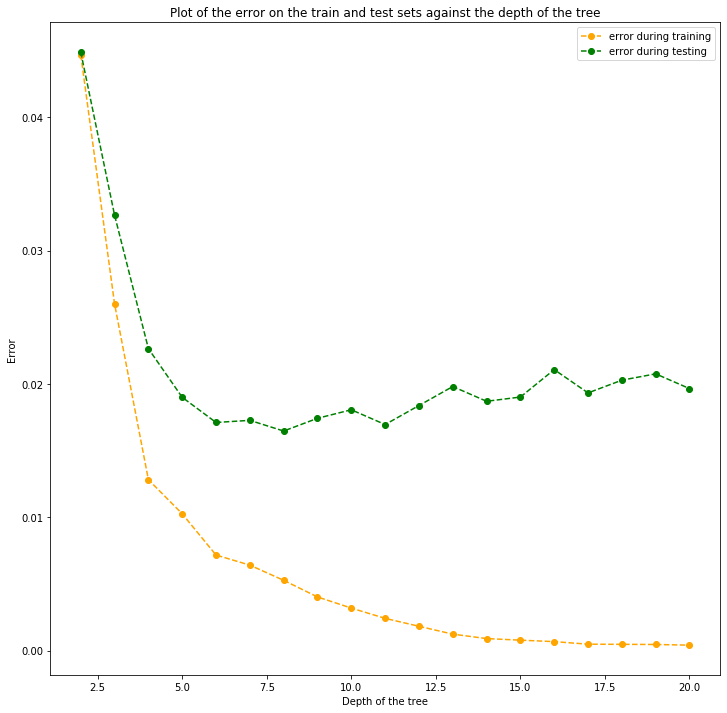

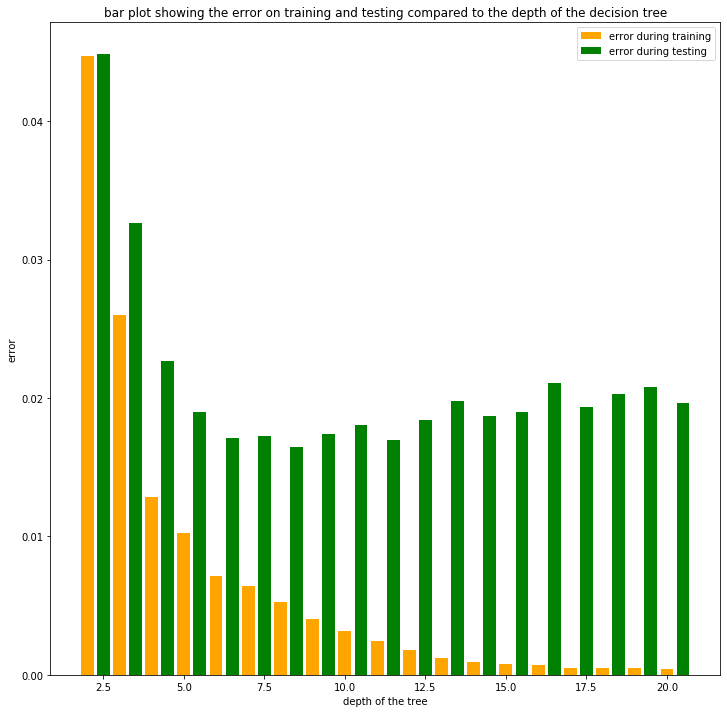

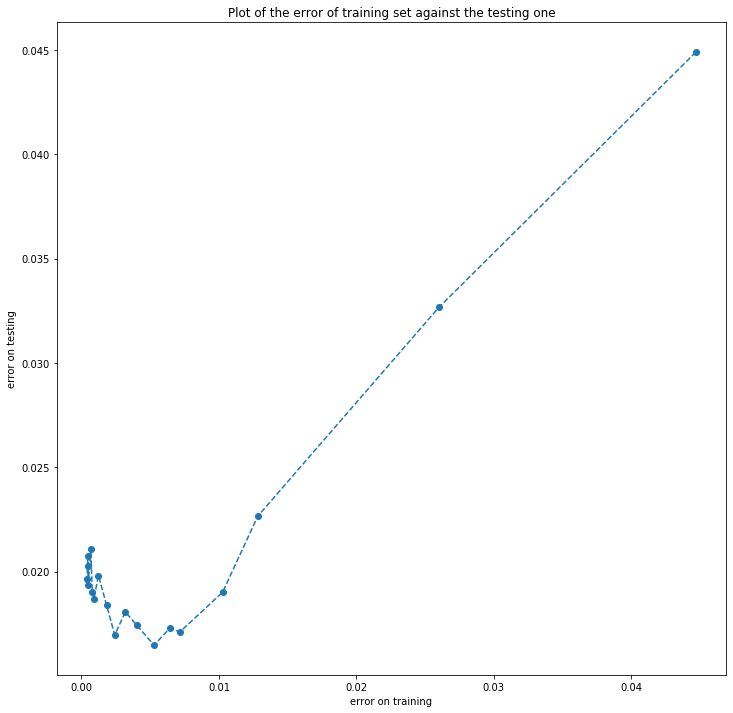

In [15]:
depthX = np.arange(19) + 2

fig = plt.figure(figsize=(12,12))

plt.plot(depthX,err_train[2:], '--o', color='orange', label="error during training")
plt.plot(depthX,err_test[2:], '--o', color='g', label="error during testing")
plt.xlabel('Depth of the tree')
plt.ylabel('Error')
plt.title('Plot of the error on the train and test sets against the depth of the tree')
plt.legend()
plt.show()

fig = plt.figure(figsize=(12,12))

plt.bar(depthX, err_train[2:], width=0.4, color='orange', label="error during training")
plt.bar(depthX + 0.5, err_test[2:], width=0.4, color='g', label="error during testing")
plt.xlabel('depth of the tree')
plt.ylabel('error')
plt.title('bar plot showing the error on training and testing compared to the depth of the decision tree')
plt.legend()
plt.show()

fig = plt.figure(figsize=(12,12))

plt.plot(err_train[2:],err_test[2:], '--o')
plt.xlabel('error on training')
plt.ylabel('error on testing')
plt.title('Plot of the error of training set against the testing one')
plt.show()

---

Using a 100-fold cross validation the result is different, with a new optimal tree depth of 8 (0.01647 of error during testing, the lowest). 
If we compare it to the 10-k fold we can notice that the lowest error in testing pass from 0.02394 to 0.01647; this is normal because the classifier has a larger dataset during training and can learn more, but it is more prone to overfit and so it could perform worse with unseen data.

As before changing the seed the result will be slightly different.

---

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    
What's the AUC you calculated? Do you think this classifier works well?


----

As an example we calculate the result for the first i that is the '1' with probability 0.4:
- j=1 is a 0 with probability 0.1; $1$ 0.4 > 0.1 is true, so we increase the score by one
- j=2 is a 0 with probability 0.2; $1$ 0.4 > 0.2 is true, so we increase the score by one
- j=3 is a 0 with probability 0.3; $1$ 0.4 > 0.3 is true, so we increase the score by one
- j=4 is a 0 with probability 0.5; $1$ 0.4 > 0.5 is false, so we don't increase the score
- j=5 is a 0 with probability 0.8; $1$ 0.4 > 0.8 is false, so we don't increase the score

So the score for i=1 is 3, then we compute for all the other ones and we compute the sum.

After the calculus we have found that the sum is 21. So the AUC is 21 divided by 25 (n\*m that is 5\*5), that is 0.84

We think that the classifier works well because the AUC score is relatively high and we have a balanced dataset (it performs much better than random guess, that has a score of 0.5).

----

#### 3.3.2
  Load the file `Data/classprobs.xls` using the Pandas `read_excel` function. Inspect the data and cast it to an array with the `.values` attribute. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).


In [16]:
import pandas as pd

data = pd.read_excel("Data/classprobs.xls", header = None)
arr = np.asarray(data.values)
print(arr)


[[1.       0.887    0.79706 ]
 [0.       0.13591  0.099401]
 [0.       0.55549  0.65075 ]
 [0.       0.23876  0.50857 ]
 [0.       0.14542  0.23629 ]
 [1.       0.81876  0.48949 ]
 [0.       0.50594  0.038203]
 [1.       0.93954  0.23982 ]
 [1.       0.22339  0.62287 ]
 [0.       0.31219  0.57823 ]
 [0.       0.19486  0.61664 ]
 [1.       0.61471  0.5013  ]
 [1.       0.63854  0.75183 ]
 [0.       0.29924  0.33768 ]
 [0.       0.16546  0.44035 ]
 [1.       0.72124  0.44813 ]
 [0.       0.1088   0.37254 ]
 [1.       0.48676  0.25349 ]
 [1.       0.94156  0.64531 ]
 [0.       0.2968   0.53258 ]
 [0.       0.24267  0.26251 ]
 [0.       0.17043  0.44888 ]
 [0.       0.015464 0.5467  ]
 [1.       0.30852  0.32406 ]
 [0.       0.11212  0.28476 ]
 [0.       0.29639  0.41658 ]
 [1.       0.97275  0.79959 ]
 [1.       0.58501  0.30657 ]
 [0.       0.12244  0.43778 ]
 [1.       0.87557  0.75815 ]
 [1.       0.76142  0.32031 ]
 [0.       0.14132  0.22986 ]
 [1.       0.86004  0.35583 ]
 [0.      

#### 3.3.3
(1 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

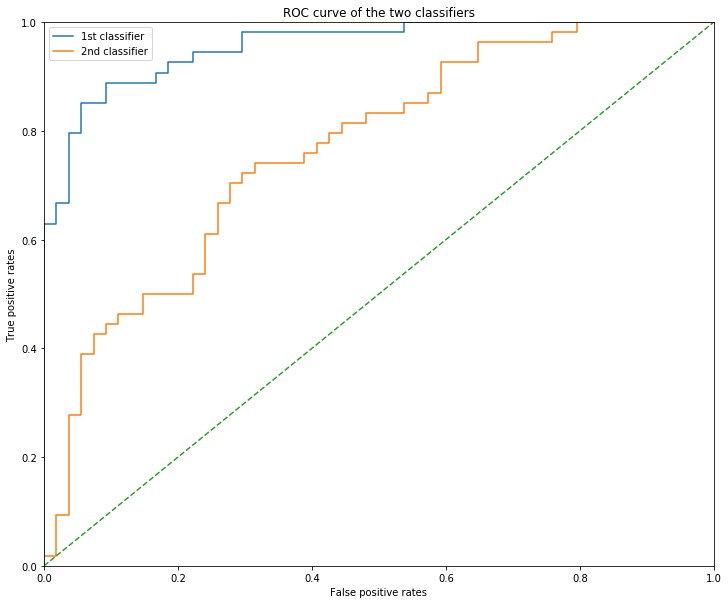

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
ran = np.linspace(0,1.0,20)
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(arr[:,0],arr[:,1], pos_label = 1)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(arr[:,0],arr[:,2], pos_label = 1)

fig = plt.figure(figsize=(12,10))

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("False positive rates")
plt.ylabel("True positive rates")
plt.plot(fpr_1, tpr_1, label = '1st classifier')
plt.plot(fpr_2, tpr_2, label = '2nd classifier')
plt.plot(ran, ran, linestyle = "dashed")
plt.legend()
plt.title("ROC curve of the two classifiers")
plt.show()

----

According to the ROC curve, the first classifier performs better than the second classifier (the first one has a higher AUC score). We can see this because the first classifier is above the second one in the plot; further you are from the diagonal line the better, because your Area under the curve will be higher (we obtain a perfect AUC of 1.0 if we have a 'True positive rates' that is always one).

Both classifiers perform better than random guessing, they both have higher AUC scores. We can see it because they are both above the diagonal line that shows the random guessing. I remind that if a curve is under the diagonal it is performing worse than the random guessing.

----

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

In [18]:
def AUC_score(y_true,y_probe):
    score = 0
    arr_size = len(y_true)
    number_of_nonzeros = np.count_nonzero(y_true)
    number_of_zeros = arr_size - number_of_nonzeros
    
    #iterating over positive(1) labels and then negative(0) labels
    for i in range(arr_size):
        if y_true[i] == 1:
            for j in range(arr_size):
                if y_true[j] == 0 and y_probe[i] > y_probe[j]:
                    score += 1
    return score / (number_of_nonzeros * number_of_zeros)

AUC_1 = AUC_score(arr[:,0],arr[:,1])
AUC_2 = AUC_score(arr[:,0],arr[:,2])

print("First classifier's score:", AUC_1)
print("Second classifier's score:", AUC_2)

First classifier's score: 0.9564471879286695
Second classifier's score: 0.7654320987654321


----

Yes, the scores definitely indicate that they are better than the baseline. The score for baseline is 0.5 which is less than the two classifiers' scores. The first classifier has a pretty high score: 0.956 and the second classifier has a score of 0.765.

----


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

** hint: **

*Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

In [19]:
acc_first = 0
arr_size = len(arr[:,0])

for i in range(arr_size):
    if arr[i,0] == 0:
        if arr[i,1] < 0.5:
            acc_first += 1
    elif arr[i,0] == 1:
        if arr[i,1] > 0.5:
            acc_first += 1

print("accuracy for the first classifier is: ", acc_first / arr_size)
            
acc_second = 0

for i in range(arr_size):
    if arr[i,0] == 0:
        if arr[i,2] < 0.5:
            acc_second += 1
    elif arr[i,0] == 1:
        if arr[i,2] > 0.5:
            acc_second += 1
            

print("accuracy for the second classifier is: ", acc_second / arr_size)

accuracy for the first classifier is:  0.8611111111111112
accuracy for the second classifier is:  0.6944444444444444


#### 3.3.6
(1 pts) Create the 2x2 table (or array, or list, or dataframe..) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

table: 
 [[67. 26.]
 [ 8.  7.]]


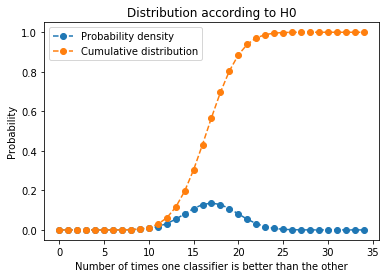


The p-value is 0.003


In [28]:
from scipy.stats import binom

table = np.zeros((2,2))

for i in range(arr_size):
    if (arr[i,0] == 0 and arr[i,1] < 0.5 and arr[i,2] < 0.5) or (arr[i,0] == 1 and arr[i,1] > 0.5 and arr[i,2] > 0.5):
        table[0, 0] += 1
    elif (arr[i,0] == 0 and arr[i,1] > 0.5 and arr[i,2] > 0.5) or (arr[i,0] == 1 and arr[i,1] < 0.5 and arr[i,2] < 0.5):
        table[1, 1] += 1
    elif (arr[i,0] == 0 and arr[i,1] < 0.5 and arr[i,2] > 0.5) or (arr[i,0] == 1 and arr[i,1] > 0.5 and arr[i,2] < 0.5):
        table[0, 1] += 1
    else:
        table[1, 0] += 1
        
print("table: \n", table)

N_first = table[0, 1]
N_second = table[1, 0]

N = int(N_first + N_second)
b = binom(N, 0.5)

plt.plot(b.pmf(range(N + 1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N + 1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one classifier is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

p_value = b.cdf(min(N_second, N_first)) + (1 - b.cdf(max(N_second, N_first) - 1))
print('\nThe p-value is {:.3f}'.format(p_value))

----

This p-value is under the significance level of 0.05 (actually is almost 0.003), so we can reject the null-hypothesis. So statistically we can now say that there is a significant reason to reject that the performance of the two classifier is the same. 

So now that we know statistically that they are not the same, we can say that the first classifier performs better than the second one because it has higher AUC_score and accuracy.

----

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [21]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<5}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

----------lucky | random 
 bet 0      | 1 | 0
 bet 1      | 1 | 1
 bet 2      | 1 | 0
 bet 3      | 0 | 1
 bet 4      | 1 | 0
 bet 5      | 1 | 1
 bet 6      | 1 | 0
 bet 7      | 1 | 0
 bet 8      | 1 | 0
 bet 9      | 0 | 1
 bet 10     | 1 | 0
 bet 11     | 1 | 1
 bet 12     | 1 | 0
 bet 13     | 1 | 1
 bet 14     | 0 | 1
 bet 15     | 1 | 1
 bet 16     | 1 | 1
 bet 17     | 0 | 0
 bet 18     | 1 | 0
 bet 19     | 1 | 0
 bet 20     | 1 | 0
 bet 21     | 0 | 0
 bet 22     | 1 | 0
 -----



Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [22]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

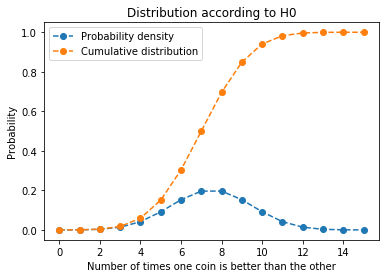

In [23]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [24]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.035


So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.